In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Análisis de la Incidencia del Dengue usando Modelos de Poisson y Binomial Negativo

Este análisis tiene como objetivo modelar los casos de dengue semanales en los distritos del departamento de Loreto utilizando la temperatura mínima semanal y sus desfases (lags) como variables predictoras. Utilizaremos dos enfoques de modelado:
1. **Modelo de Poisson**, que es comúnmente utilizado para datos de conteo.
2. **Modelo Binomial Negativo**, que es más adecuado cuando hay evidencia de sobredispersión.

## Carga de datos

Primero, cargamos los datos del archivo CSV que contiene la información de los casos de dengue, la temperatura mínima y otras variables relevantes.

In [3]:
df = pd.read_csv("C:/Users/USUARIO/OneDrive/Documentos/Portafolio/Dengue-Incidence-Analysis/1_data/dengue_temp_population_loreto.csv")
df

,ano,semana,distrito,ubigeo,total_casos,temp_min_semana,population,temp_min_lag1,temp_min_lag2,temp_min_lag3,temp_min_lag4,temp_min_lag5,temp_min_lag6,temp_min_lag7
0,2017,1,ALTO NANAY,160102.0,0,22.098388,2855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,ALTO TAPICHE,160502.0,0,20.769270,1515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,ANDOAS,160706.0,0,21.732227,11714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,BALSAPUERTO,160202.0,0,20.018025,13707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,BARRANCA,160701.0,0,20.251695,12742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16323,2022,52,URARINAS,160305.0,0,21.975947,14079,22.465956,22.347328,21.778241,22.329363,21.950958,21.987599,21.436799
16324,2022,52,VARGAS GUERRA,160606.0,0,21.749073,7495,22.333004,22.314584,20.688402,22.386892,22.262900,22.341957,21.392551
16325,2022,52,YAQUERANA,160511.0,0,21.580662,2232,22.079004,22.612750,20.721676,22.182780,22.301145,22.382496,20.754686
16326,2022,52,YAVARI,160403.0,0,22.213742,9998,22.178608,22.584917,22.291275,22.409327,22.450367,22.566829,21.771247


## Definición del modelo y ajuste del Modelo de Poisson

A continuación, definimos la fórmula del modelo, que incluye las variables de temperatura mínima y sus desfases. Luego, ajustamos un modelo de Poisson.

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Paso 1: Definir la fórmula del modelo con las variables con lag
# Añadimos las variables de temperatura mínima y sus desfases (lags)
formula = 'total_casos ~ temp_min_semana + temp_min_lag1 + temp_min_lag2 + temp_min_lag3 + temp_min_lag4 + temp_min_lag5 + temp_min_lag6 + temp_min_lag7'

# Ajustar un modelo Poisson
modelo_poisson = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()

# Resumen del modelo Poisson
print(modelo_poisson.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_casos   No. Observations:                15964
Model:                            GLM   Df Residuals:                    15955
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -74385.
Date:                Tue, 22 Oct 2024   Deviance:                   1.3884e+05
Time:                        02:32:32   Pearson chi2:                 6.80e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08937
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.3701      0.148    -


El resumen del modelo proporciona información sobre los coeficientes, su significancia y el ajuste general del modelo. Los coeficientes con p-valores bajos indican que son predictores significativos.

## Evaluación del ajuste del modelo de Poisson

Para evaluar la calidad del ajuste del modelo, calculamos dos métricas clave:
- **Devianza/Grados de Libertad (DF)**: Mide la calidad del ajuste del modelo en relación con la variabilidad observada en los datos.
- **Pearson Chi2/DF**: Indica la sobredispersión en el modelo.




In [10]:
# Calcular devianza y Pearson chi-square
devianza_poisson = modelo_poisson.deviance
pearson_chi2_poisson = sum(modelo_poisson.resid_pearson**2)
grados_libertad = modelo_poisson.df_resid

print(f'Devianza/DF: {devianza_poisson / grados_libertad}')
print(f'Pearson Chi2/DF: {pearson_chi2_poisson / grados_libertad}')

Devianza/DF: 8.702119903835104
Pearson Chi2/DF: 42.61988413750896


## Ajuste del Modelo Binomial Negativo

Dado que la evaluación del modelo de Poisson sugiere sobredispersión (Pearson Chi2/DF > 1), ajustamos un modelo Binomial Negativo, que es más adecuado para datos de conteo con sobredispersión.



In [16]:
# Ajustar un modelo binomial negativo
modelo_binomial_negativo = smf.glm(formula=formula, 
                                   data=df, 
                                   family=sm.families.NegativeBinomial()).fit()

# Resumen del modelo binomial negativo
print(modelo_binomial_negativo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_casos   No. Observations:                15964
Model:                            GLM   Df Residuals:                    15955
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28116.
Date:                Tue, 22 Oct 2024   Deviance:                       40893.
Time:                        02:37:20   Pearson chi2:                 2.54e+05
No. Iterations:                     9   Pseudo R-squ. (CS):            0.03357
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.9646      0.225    -

c:\Users\USUARIO\OneDrive\Documentos\Portafolio\Dengue-Incidence-Analysis\env\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


### Interpretación de los Coeficientes

- **Intercepto (Intercept)**: -3.96. Este es el valor de la intersección cuando todas las variables predictoras son cero, lo que significa que cuando la temperatura mínima y sus desfases son cero, el logaritmo de los casos esperados es -3.96.
  
- **temp_min_semana**: 0.1069, **p-valor < 0.0001**. Este coeficiente es significativo, lo que indica que la temperatura mínima de la semana actual tiene una relación positiva y significativa con los casos de dengue. Por cada incremento unitario en la temperatura mínima semanal, el logaritmo del número de casos esperados aumenta en 0.1069.
  
- **temp_min_lag1**: 0.0503, **p-valor < 0.0001**. La temperatura mínima de la semana anterior también tiene una relación positiva con los casos actuales de dengue. Este coeficiente indica que un aumento en la temperatura mínima hace una semana se asocia con un aumento en los casos actuales de dengue.
  
- **temp_min_lag2**: 0.0117, **p-valor = 0.285**. Este coeficiente no es significativo, lo que sugiere que la temperatura mínima hace dos semanas no tiene un efecto estadísticamente significativo sobre los casos actuales de dengue.
  
- **temp_min_lag3**: 0.0305, **p-valor = 0.006**. La temperatura mínima hace tres semanas muestra un efecto significativo, aunque menor, sobre los casos actuales. Un aumento en la temperatura de hace tres semanas se asocia con un aumento moderado en los casos de dengue.
  
- **temp_min_lag7**: -0.0350, **p-valor < 0.0001**. Este coeficiente es significativo y negativo, lo que indica que la temperatura mínima de hace siete semanas tiene un efecto negativo sobre los casos actuales de dengue. Esto sugiere que una temperatura alta hace siete semanas puede estar relacionada con una disminución en los casos actuales.

### Conclusiones del Modelo

- Las temperaturas mínimas actuales y con desfases de 1 y 3 semanas parecen tener un impacto positivo significativo en la incidencia de dengue.
- La temperatura mínima de hace 7 semanas muestra un impacto negativo, lo que podría estar relacionado con efectos biológicos, como el ciclo de vida del mosquito vector del dengue.
- Aunque algunos coeficientes son estadísticamente significativos, los valores de los coeficientes son relativamente bajos, lo que indica que, aunque la temperatura influye en los casos de dengue, es probable que existan otros factores relevantes que no se están considerando en este modelo.
  
Este análisis sugiere que el uso de un modelo binomial negativo es adecuado debido a la sobredispersión presente en los datos, y que la temperatura mínima semanal tiene un efecto significativo pero moderado en los casos de dengue.

## Comparación entre los Modelos de Poisson y Binomial Negativo

El criterio de información de Akaike (**AIC**) es utilizado para comparar modelos. Un AIC más bajo indica un mejor ajuste. A continuación, comparamos el AIC de ambos modelos.

In [17]:
print(f'AIC Poisson: {modelo_poisson.aic}')
print(f'AIC Binomial Negativo: {modelo_binomial_negativo.aic}')

AIC Poisson: 148788.749073087
AIC Binomial Negativo: 56249.34373379561


## Análisis de Residuos

El análisis de residuos nos permite verificar si el modelo se ajusta bien a los datos o si quedan patrones no explicados por el modelo. Comenzamos con los residuos brutos y los residuos de deviance.

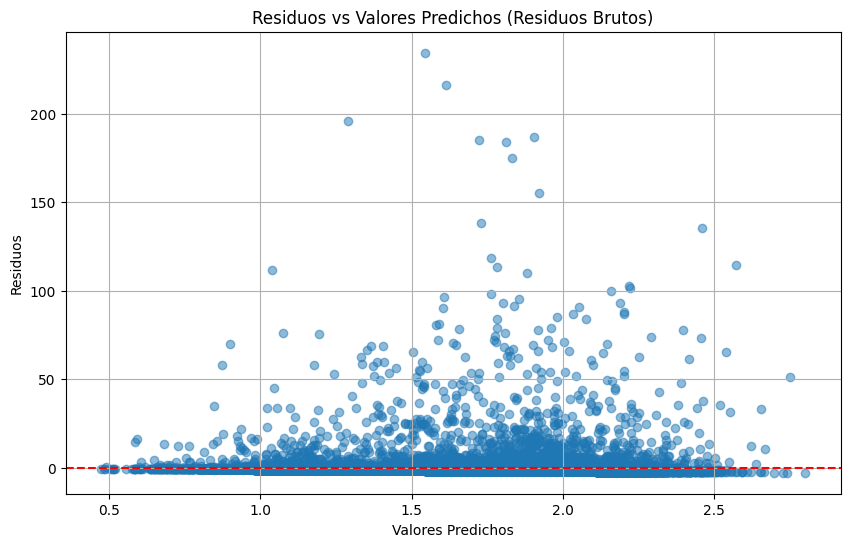

In [21]:
# Paso 1: Calcular los valores predichos
predicted_casos = modelo_binomial_negativo.fittedvalues

# Paso 2: Calcular los residuos brutos
residuals = df['total_casos'] - predicted_casos

# Asegurarse de que no haya valores NaN en los datos
valid_mask = (~predicted_casos.isna()) & (~residuals.isna())

# Graficar residuos vs valores predichos (para verificar patrones)
plt.figure(figsize=(10, 6))
plt.scatter(predicted_casos[valid_mask], residuals[valid_mask], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos (Residuos Brutos)')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()


### Residuos de Deviance

Los residuos de deviance proporcionan otra métrica para evaluar el ajuste del modelo. Si los residuos no muestran patrones claros y están distribuidos aleatoriamente alrededor de cero, esto indica un buen ajuste del modelo.

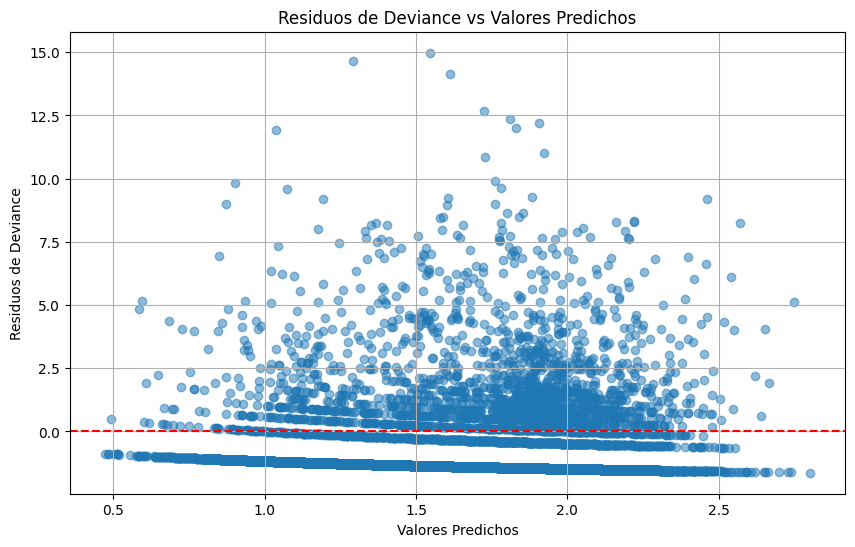

In [20]:
# Graficar Residuos de Deviance vs Valores Predichos
deviance_residuals = modelo_binomial_negativo.resid_deviance[valid_mask]
plt.figure(figsize=(10, 6))
plt.scatter(predicted_casos[valid_mask], deviance_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos de Deviance vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos de Deviance')
plt.grid(True)
plt.show()